<a href="https://colab.research.google.com/github/mendiang/Metal-Surface-Defect/blob/main/Metal_Surface_Defects_GC10_DETipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Overview about the  GC10-DET dataset

The GC10-DET dataset is the surface defect dataset collected in a real industry. It contains ten types of surface defects, i.e., punching (Pu), weld line (Wl), crescent gap (Cg), water spot (Ws), oil spot (Os), silk spot (Ss), inclusion (In), rolled pit (Rp), crease (Cr), waist folding (Wf). The collected defects are on the surface of the steel sheet. The dataset includes 3570 gray-scale images. The detailed defects are as follows:

*  Punching: In the production line of the strip, the steel strip needs to be punched according to the product specifications; mechanical failure may lead to unwanted punching, resulting in punching defects.
*  Welding line: When the strip is changed, it is necessary to weld the two coils of the strip, and the weld line is produced. Strictly speaking, this is not a defect, but it needs to be automatically detected and tracked to be circumvented in subsequent cuts.
*  Crescent gap: In the production of steel strip, cutting sometimes results in defects, just like half a circle.
*  Water spot: A water spot is produced by drying in production. Under different products and processes, the requirements for this defect are different. However, because the water spots are generally with low contrast, and are similar to other defects such as oil spots, they are usually detected by mistake.
*  Oil spot: An oil spot is usually caused by the contamination of mechanical lubricant, which will affect the appearance of the product.
*  Silk spot: A local or continuous wave-like plaque on a strip surface that may appear on the upper and lower surfaces, and the density is uneven in the whole strip length direction. Generally, the main reason lies in the uneven temperature of the roller and uneven pressure.
*  Inclusion: Inclusion is a typical defect of metal surface defects, usually showing small spots, fish scale shape, strip shape, block irregular distribution in the strip of the upper and lower surface (global or local), and is often accompanied by rough pockmarked surfaces. Some inclusions are loose and easy to fall off and some are pressed into the plate.
*  Rolled pit: Rolled pits are periodic bulges or pits on the surface of a steel plate that are punctate, flaky, or strip-like. They are distributed throughout the strip length or section, mainly caused by work roll or tension roll damage.
*  Crease: A crease is a vertical transverse fold, with regular or irregular spacing across the strip, or at the edge of the strip. The main reason is the local yield along the moving direction of the strip in the uncoiling process.
*  Waist folding: There are obvious folds in the defect parts, a little more popular, a little like wrinkles, indicating that the local deformation of the defect is too large. The reason is due to low-carbon.


In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"imammukhri","key":"eb9766ded639cf23df08187c5e57f8e0"}'}

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 66 Aug  1 18:31 kaggle.json


In [3]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [4]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d zhangyunsheng/defects-class-and-location

100% 922M/923M [00:09<00:00, 136MB/s]
100% 923M/923M [00:09<00:00, 104MB/s]


In [6]:
!unzip /content/defects-class-and-location.zip

Archive:  /content/defects-class-and-location.zip
  inflating: images/images/crease/img_01_3436789500_00004.jpg  
  inflating: images/images/crease/img_01_425382900_00002.jpg  
  inflating: images/images/crease/img_01_425501700_00022.jpg  
  inflating: images/images/crease/img_01_429539000_00002.jpg  
  inflating: images/images/crease/img_01_4402116900_00003.jpg  
  inflating: images/images/crease/img_01_4402117100_00006.jpg  
  inflating: images/images/crease/img_01_4402117200_00003.jpg  
  inflating: images/images/crease/img_01_4402270500_00003.jpg  
  inflating: images/images/crease/img_01_4402270500_00004.jpg  
  inflating: images/images/crease/img_01_4403690400_00005.jpg  
  inflating: images/images/crease/img_02_3436789500_00005.jpg  
  inflating: images/images/crease/img_02_425613700_00758.jpg  
  inflating: images/images/crease/img_02_4402116700_00002.jpg  
  inflating: images/images/crease/img_02_4406430100_00002.jpg  
  inflating: images/images/crease/img_02_4406783500_00004.

In [7]:
import os
os.listdir('/content/images/images')

['rolled_pit',
 'water_spot',
 'crease',
 'inclusion',
 'punching_hole',
 'crescent_gap',
 'oil_spot',
 'waist folding',
 'welding_line',
 'silk_spot']

In [8]:
os.listdir('/content/label/label')

['img_06_425505400_00052.xml',
 'img_06_4406743300_00092.xml',
 'img_01_425005700_00258.xml',
 'img_02_SIS001561_01413.xml',
 'img_02_425614600_00432.xml',
 'img_01_425005700_00506.xml',
 'img_07_435974600_00211.xml',
 'img_07_4406645900_00746.xml',
 'img_05_425244400_00881.xml',
 'img_06_425508100_00054.xml',
 'img_03_3403401700_00908.xml',
 'img_03_3402617100_00131.xml',
 'img_06_4406645900_00494.xml',
 'img_08_4403744200_01180.xml',
 'img_06_3403328800_01055.xml',
 'img_03_3403397300_00901.xml',
 'img_07_425390900_00113.xml',
 'img_07_4406645900_00046.xml',
 'img_08_425502900_00053.xml',
 'img_02_425508400_00140.xml',
 'img_01_425005700_00453.xml',
 'img_02_425243400_00057.xml',
 'img_01_425637900_00899.xml',
 'img_04_4402831800_01217.xml',
 'img_06_425502600_00053.xml',
 'img_08_4406772100_00002.xml',
 'img_01_425005700_00279.xml',
 'img_06_425390200_00053.xml',
 'img_04_SIS001577_00040.xml',
 'img_07_425508700_00362.xml',
 'img_08_425506100_00159.xml',
 'img_04_424714400_00324.xml

In [9]:
import glob

image_path = glob.glob('/content/images/images/*/*.jpg')
len(image_path)

2306

In [10]:
image_path[:3]

['/content/images/images/rolled_pit/img_02_431854300_00002.jpg',
 '/content/images/images/rolled_pit/img_03_4402724500_01243.jpg',
 '/content/images/images/rolled_pit/img_03_425622700_00002.jpg']

In [11]:
xmls_path = glob.glob('/content/label/label/*.xml')
len(xmls_path)

2280

In [12]:
xmls_path[:3]

['/content/label/label/img_06_425505400_00052.xml',
 '/content/label/label/img_06_4406743300_00092.xml',
 '/content/label/label/img_01_425005700_00258.xml']

In [13]:
#xml_name extraction
xmls_train = [p.split('/')[-1].split('.')[0] for p in xmls_path]
xmls_train[:3]

['img_06_425505400_00052', 'img_06_4406743300_00092', 'img_01_425005700_00258']

In [14]:
#img_name extraction to combine with xml_name extraction
imgs_train = [img for img in image_path if (img.split('/')[-1].split)('.jpg')[0] in xmls_train]
imgs_train[:3]

['/content/images/images/rolled_pit/img_02_431854300_00002.jpg',
 '/content/images/images/rolled_pit/img_03_4402724500_01243.jpg',
 '/content/images/images/rolled_pit/img_03_425622700_00002.jpg']

In [15]:
len(imgs_train),len(xmls_path)

(2280, 2280)

In [16]:
#check the image to label sorts
xmls_path.sort(key=lambda x:x.split('/')[-1].split('.xml')[0])
imgs_train.sort(key=lambda x:x.split('/')[-1].split('.jpg')[0])
xmls_path[:3],imgs_train[:3]

(['/content/label/label/img_01_3402617700_00001.xml',
  '/content/label/label/img_01_3402617700_01009.xml',
  '/content/label/label/img_01_3436789500_00004.xml'],
 ['/content/images/images/crescent_gap/img_01_3402617700_00001.jpg',
  '/content/images/images/crescent_gap/img_01_3402617700_01009.jpg',
  '/content/images/images/crease/img_01_3436789500_00004.jpg'])

In [17]:
#labels names
names = [x.split("/")[-2] for x in imgs_train]
names[:3]

['crescent_gap', 'crescent_gap', 'crease']

In [18]:
import pandas as pd

names = pd.DataFrame(names,columns=['Types'])
names

,Types
0,crescent_gap
1,crescent_gap
2,crease
3,silk_spot
4,silk_spot
...,...
2275,silk_spot
2276,silk_spot
2277,silk_spot
2278,silk_spot


In [19]:
#onehot for mutiple classes
from sklearn.preprocessing import LabelBinarizer

Class = names['Types'].unique()
Class_dict = dict(zip(Class, range(1,len(Class)+1)))
names['str'] = names['Types'].apply(lambda x: Class_dict[x])
lb = LabelBinarizer()
lb.fit(list(Class_dict.values()))
transformed_labels = lb.transform(names['str'])
y_bin_labels = []  

for i in range(transformed_labels.shape[1]):
    y_bin_labels.append('str' + str(i))
    names['str' + str(i)] = transformed_labels[:, i]

In [20]:
Class_dict

{'crease': 2,
 'crescent_gap': 1,
 'inclusion': 6,
 'oil_spot': 7,
 'punching_hole': 10,
 'rolled_pit': 9,
 'silk_spot': 3,
 'waist folding': 8,
 'water_spot': 4,
 'welding_line': 5}

In [21]:
names.drop('str',axis=1,inplace=True)
names.drop('Types',axis=1,inplace=True)
names.head()

,str0,str1,str2,str3,str4,str5,str6,str7,str8,str9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [22]:
from lxml import etree

#analysis rectangular box value in xmls
def to_labels(path):
    xml = open('{}'.format(path)).read()                         #read xml in path 
    sel = etree.HTML(xml)                     
    width = int(sel.xpath('//size/width/text()')[0])     #extract the width/height
    height = int(sel.xpath('//size/height/text()')[0])    #extract the x,y value
    xmin = int(sel.xpath('//bndbox/xmin/text()')[0])
    xmax = int(sel.xpath('//bndbox/xmax/text()')[0])
    ymin = int(sel.xpath('//bndbox/ymin/text()')[0])
    ymax = int(sel.xpath('//bndbox/ymax/text()')[0])
    return [xmin/width, ymin/height, xmax/width, ymax/height]   #return the four relative points 

In [23]:
#set value to labels
labels = [to_labels(path) for path in xmls_path]
labels[:3]

[[0.8486328125, 0.806, 0.951171875, 0.993],
 [0.857421875, 0.298, 0.96044921875, 0.858],
 [0.47900390625, 0.182, 0.9990234375, 0.249]]

In [24]:
import numpy as np

#set four labels as outputs
out1,out2,out3,out4 = list(zip(*labels))        
#convert to np.array
out1 = np.array(out1)
out2 = np.array(out2)
out3 = np.array(out3)
out4 = np.array(out4)
label = np.array(names.values)

In [25]:
import tensorflow as tf

#label to tf.data
label_datasets = tf.data.Dataset.from_tensor_slices((out1,out2,out3,out4,label))
label_datasets

<TensorSliceDataset shapes: ((), (), (), (), (10,)), types: (tf.float64, tf.float64, tf.float64, tf.float64, tf.int64)>

In [26]:
#def load_image function
def load_image(path):
    image = tf.io.read_file(path)                           
    image = tf.image.decode_jpeg(image,3)               
    image = tf.image.resize(image,[224,224])               
    image = tf.cast(image/127.5-1,tf.float32)                 
    return image      

In [27]:
#build dataset
dataset = tf.data.Dataset.from_tensor_slices(imgs_train)
dataset = dataset.map(load_image)

In [28]:
dataset_label = tf.data.Dataset.zip((dataset,label_datasets))

In [29]:
#batch constant
BATCH_SIZE = 16
AUTO = tf.data.experimental.AUTOTUNE

In [30]:
#batch extraction and shuffle
dataset_label = dataset_label.repeat().shuffle(500).batch(BATCH_SIZE)
dataset_label = dataset_label.prefetch(AUTO)

In [31]:
#Split dataset
test_count = int(len(imgs_train)*0.2)
train_count = len(imgs_train) - test_count
test_count,train_count

(456, 1824)

In [32]:
train_dataset = dataset_label.skip(test_count)
test_dataset = dataset_label.take(test_count)

In [33]:
train_dataset

<SkipDataset shapes: ((None, 224, 224, 3), ((None,), (None,), (None,), (None,), (None, 10))), types: (tf.float32, (tf.float64, tf.float64, tf.float64, tf.float64, tf.int64))>

In [34]:
species_dict = {v:k for k,v in Class_dict.items()}

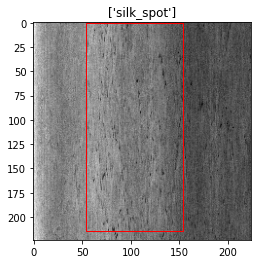

In [58]:
import matplotlib.pyplot as plt
from tensorflow import keras
from matplotlib.patches import Rectangle

#check from train_data
for img, label in train_dataset.take(1):
    plt.imshow(keras.preprocessing.image.array_to_img(img[0]))     
    out1,out2,out3,out4,out5 = label                            
    xmin,ymin,xmax,ymax = out1[0].numpy()*224,out2[0].numpy()*224,out3[0].numpy()*224,out4[0].numpy()*224
    rect = Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),fill=False,color='r')  
    ax = plt.gca()                      
    ax.axes.add_patch(rect)   
    pred_imglist = []
    pred_imglist.append(species_dict[np.argmax(out5[0])+1])
    plt.title(pred_imglist)
    plt.show()

#2. Model Building

In [36]:
#Convolution based
model_base = keras.applications.xception.Xception(weights='imagenet',
                                            include_top=False,
                                            input_shape=(224,224,3),
                                            pooling='avg')

83689472/83683744 [==============================] - 0s 0us/step


In [37]:
model_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [38]:
#open trainable
#model_base.trainable = False

# Let's take a look to see how many layers are in the base model
#print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
#fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
#for layer in new_model.layers[:fine_tune_at]:
    #layer.trainable =  False

In [39]:
model_base.trainable = True

set_trainable = False
for layer in model_base.layers:
    if layer.name in ['block10_sepconv1_act', 'block11_sepconv1_act', 'block12_sepconv1_act', 'block13_sepconv1_act', 'block14_sepconv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in model_base.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])   

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.In...,input_1,False
1,<tensorflow.python.keras.layers.convolutional....,block1_conv1,False
2,<tensorflow.python.keras.layers.normalization_...,block1_conv1_bn,False
3,<tensorflow.python.keras.layers.core.Activatio...,block1_conv1_act,False
4,<tensorflow.python.keras.layers.convolutional....,block1_conv2,False
...,...,...,...
128,<tensorflow.python.keras.layers.core.Activatio...,block14_sepconv1_act,True
129,<tensorflow.python.keras.layers.convolutional....,block14_sepconv2,True
130,<tensorflow.python.keras.layers.normalization_...,block14_sepconv2_bn,True
131,<tensorflow.python.keras.layers.core.Activatio...,block14_sepconv2_act,True


In [40]:
model_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [41]:
#define Conv + FC structure
inputs = keras.Input(shape=(224,224,3))
x = model_base(inputs)
x1 = keras.layers.Dense(1024,activation='relu')(x)
x1 = keras.layers.Dense(512,activation='relu')(x1)


out1 = keras.layers.Dense(1,name='out1')(x1)
out2 = keras.layers.Dense(1,name='out2')(x1)
out3 = keras.layers.Dense(1,name='out3')(x1)
out4 = keras.layers.Dense(1,name='out4')(x1)

x2 = keras.layers.Dense(1024,activation='relu')(x)
x2 = keras.layers.Dropout(0.5)(x2)
x2 = keras.layers.Dense(512,activation='relu')(x2)
out_class = keras.layers.Dense(10,activation='softmax',name='out_item')(x2)

out = [out1,out2,out3,out4,out_class]

model = keras.models.Model(inputs=inputs,outputs=out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
xception (Functional)           (None, 2048)         20861480    input_2[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 1024)         2098176     xception[0][0]                   
__________________________________________________________________________________________________
dense (Dense)                   (None, 1024)         2098176     xception[0][0]                   
______________________________________________________________________________________________

In [42]:
#model compille
model.compile(keras.optimizers.Adam(0.0003),
              loss={'out1':'mse',
                    'out2':'mse',
                    'out3':'mse',
                    'out4':'mse',
                    'out_item':'categorical_crossentropy'},
              metrics=['mae','acc'])

In [43]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

#learning_rate reduce module
lr_reduce = keras.callbacks.ReduceLROnPlateau('val_loss', patience=6, factor=0.5, min_lr=1e-6)

# Stop early if model doesn't improve after n epochs
early_stopper = EarlyStopping(monitor='val_loss', patience=12,
                              verbose=0, restore_best_weights=True)

In [44]:
history = model.fit(train_dataset,
                   steps_per_epoch=train_count//BATCH_SIZE,
                   epochs=100,
                   callbacks=[lr_reduce, early_stopper],
                   validation_data=test_dataset,
                   validation_steps=test_count//BATCH_SIZE)

Epoch 1/100
114/114 [==============================] - 111s 210ms/step - loss: 1.5602 - out1_loss: 0.0688 - out2_loss: 0.0534 - out3_loss: 0.0804 - out4_loss: 0.0874 - out_item_loss: 1.2702 - out1_mae: 0.1980 - out1_acc: 0.0000e+00 - out2_mae: 0.1773 - out2_acc: 0.0000e+00 - out3_mae: 0.2195 - out3_acc: 0.0658 - out4_mae: 0.2321 - out4_acc: 0.0641 - out_item_mae: 0.1116 - out_item_acc: 0.5641 - val_loss: 0.9457 - val_out1_loss: 0.1121 - val_out2_loss: 0.0420 - val_out3_loss: 0.0715 - val_out4_loss: 0.0732 - val_out_item_loss: 0.6469 - val_out1_mae: 0.2645 - val_out1_acc: 0.0000e+00 - val_out2_mae: 0.1545 - val_out2_acc: 0.0000e+00 - val_out3_mae: 0.2058 - val_out3_acc: 0.1138 - val_out4_mae: 0.2009 - val_out4_acc: 0.1094 - val_out_item_mae: 0.0592 - val_out_item_acc: 0.7589
Epoch 2/100
114/114 [==============================] - 24s 208ms/step - loss: 0.7593 - out1_loss: 0.0409 - out2_loss: 0.0356 - out3_loss: 0.0497 - out4_loss: 0.0483 - out_item_loss: 0.5847 - out1_mae: 0.1493 - out1_

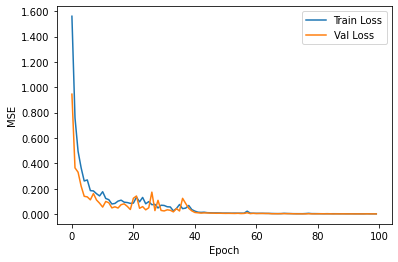

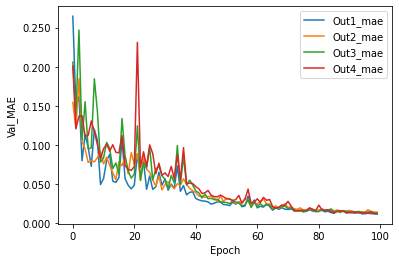

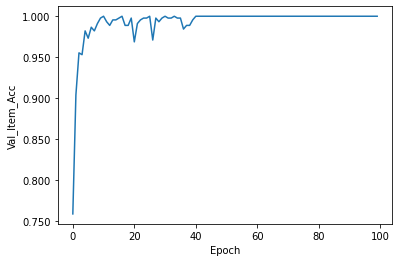

In [45]:
from matplotlib.ticker import StrMethodFormatter
#training visualization
def plot_history(history):                
    hist = pd.DataFrame(history.history)           
    hist['epoch']=history.epoch
    
    plt.figure()                                     
    plt.xlabel('Epoch')
    plt.ylabel('MSE')  
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}')) # 3 decimal places              
    plt.plot(hist['epoch'],hist['loss'],
            label='Train Loss')
    plt.plot(hist['epoch'],hist['val_loss'],
            label='Val Loss')                           
    plt.legend()

    plt.figure()                                      
    plt.xlabel('Epoch')
    plt.ylabel('Val_MAE') 
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}')) # 3 decimal places               
    plt.plot(hist['epoch'],hist['val_out1_mae'],
            label='Out1_mae')
    plt.plot(hist['epoch'],hist['val_out2_mae'],
            label='Out2_mae')
    plt.plot(hist['epoch'],hist['val_out3_mae'],
            label='Out3_mae')
    plt.plot(hist['epoch'],hist['val_out4_mae'],
            label='Out4_mae')
    plt.legend()      
    
    plt.figure()                                      
    plt.xlabel('Epoch')
    plt.ylabel('Val_Item_Acc')
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}')) # 3 decimal places                
    plt.plot(hist['epoch'],hist['val_out_item_acc'],
            label='Out5_acc')
    
    plt.show()
    
plot_history(history)  

In [46]:
mae = model.evaluate(test_dataset)

456/456 [==============================] - 58s 120ms/step - loss: 0.0014 - out1_loss: 2.7324e-04 - out2_loss: 3.5185e-04 - out3_loss: 3.8853e-04 - out4_loss: 3.4909e-04 - out_item_loss: 6.9756e-07 - out1_mae: 0.0122 - out1_acc: 0.0000e+00 - out2_mae: 0.0135 - out2_acc: 0.0000e+00 - out3_mae: 0.0131 - out3_acc: 0.0935 - out4_mae: 0.0134 - out4_acc: 0.0785 - out_item_mae: 1.4092e-07 - out_item_acc: 1.0000


In [47]:
print('out1_mae in test:{}'.format(mae[6]))
print('out2_mae in test:{}'.format(mae[8]))
print('out3_mae in test:{}'.format(mae[10]))
print('out4_mae in test:{}'.format(mae[12]))
print('class_label in test:{}'.format(mae[15]))

out1_mae in test:0.01216423511505127
out2_mae in test:0.01347931195050478
out3_mae in test:0.01307256706058979
out4_mae in test:0.013432708568871021
class_label in test:1.0


In [48]:
species_dict = {v:k for k,v in Class_dict.items()}

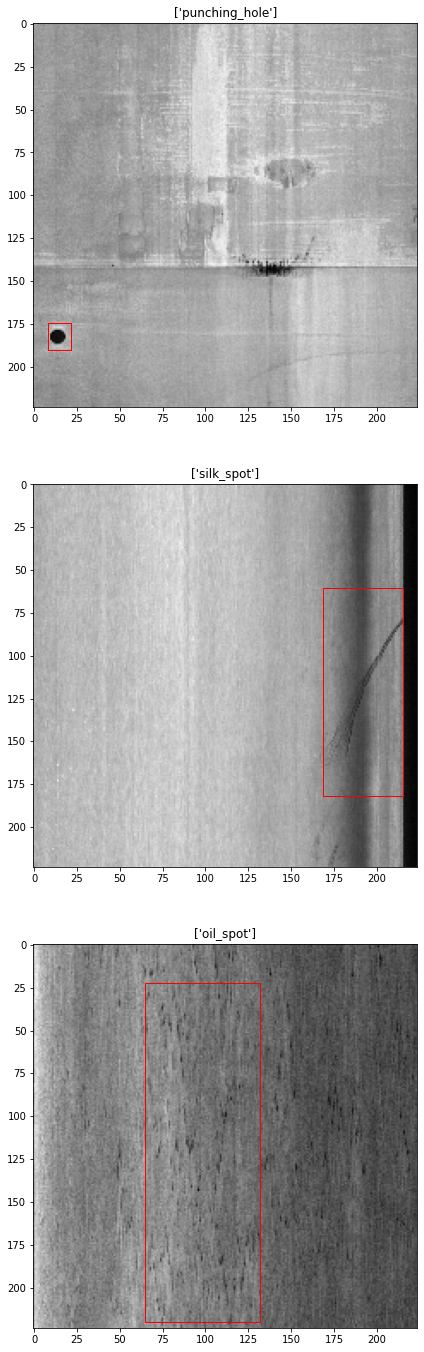

In [54]:
plt.figure(figsize=(10,24))
for img,_ in train_dataset.take(1):
    out1,out2,out3,out4,label = model.predict(img)
    for i in range(3):
        plt.subplot(3,1,i+1)            
        plt.imshow(keras.preprocessing.image.array_to_img(img[i]))    
        pred_imglist = []
        pred_imglist.append(species_dict[np.argmax(out5[i])+1])
        plt.title(pred_imglist)
        xmin,ymin,xmax,ymax = out1[i]*224,out2[i]*224,out3[i]*224,out4[i]*224
        rect = Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),fill=False,color='r') 
        ax = plt.gca()                   
        ax.axes.add_patch(rect)        